In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
candidates = ['Biden', 'Bloomberg', 'Buttigieg', 'Klobuchar', 'Sanders', 'Steyer', 'Trump', 'Warren', 'Yang', 'Gabbard']

### Candidate Mentions - Article-Level

In [3]:
full_data = pd.read_csv('data/full_data.csv')
full_data['date'] = pd.to_datetime(full_data['date'], errors='coerce')
full_data['date'] = full_data['date'].dt.date

In [4]:
# filtering weird dates
mask = full_data['date'].astype('str') >= "2020-03-01"
full_data = full_data.loc[mask]

##### number of articles where candidate is the only one mentioned

In [5]:
one_cand = full_data.loc[full_data['candidates_mentioned'] == 1, candidates]
sum_one_cand = one_cand.sum(axis = 0, skipna = True)
sum_one_cand = sum_one_cand.to_frame(name = 'count').rename_axis('candidate').reset_index()

In [6]:
sum_one_cand

,candidate,count
0,Biden,12
1,Bloomberg,5
2,Buttigieg,0
3,Klobuchar,0
4,Sanders,17
5,Steyer,0
6,Trump,941
7,Warren,1
8,Yang,6
9,Gabbard,0


Text(0.5, 1.0, 'Solo Candidate Mentions')

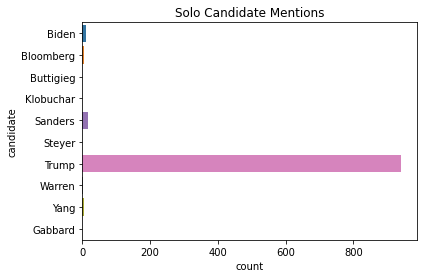

In [7]:
sns.barplot(x = 'count', y = 'candidate', data = sum_one_cand)
plt.title('Solo Candidate Mentions')

Text(0.5, 1.0, 'Solo Candidate Mentions (Democrats Only)')

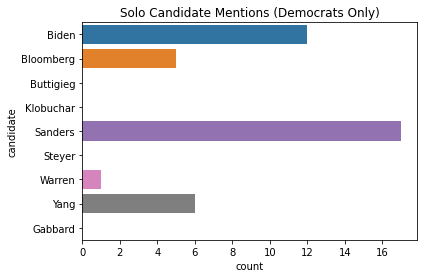

In [8]:
# without Trump
one_cand_no_trump = sum_one_cand[sum_one_cand['candidate'] != 'Trump']
sns.barplot(x = 'count', y = 'candidate', data = one_cand_no_trump)
plt.title('Solo Candidate Mentions (Democrats Only)')

##### number of articles where candidate is mentioned (perhaps along with others)

In [9]:
sum_cand_total = full_data.loc[:, candidates].sum(axis = 0, skipna = True)
sum_cand_total = sum_cand_total.to_frame(name = 'count').rename_axis('candidate').reset_index()

In [10]:
sum_cand_total

,candidate,count
0,Biden,711
1,Bloomberg,206
2,Buttigieg,170
3,Klobuchar,173
4,Sanders,665
5,Steyer,102
6,Trump,1564
7,Warren,242
8,Yang,132
9,Gabbard,145


Text(0.5, 1.0, 'Total Candidate Mentions')

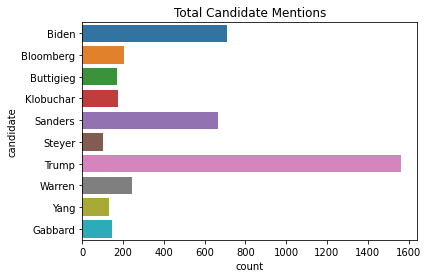

In [11]:
sns.barplot(x = 'count', y = 'candidate', data = sum_cand_total)
plt.title('Total Candidate Mentions')

Text(0.5, 1.0, 'Total Candidate Mentions (Democrats Only)')

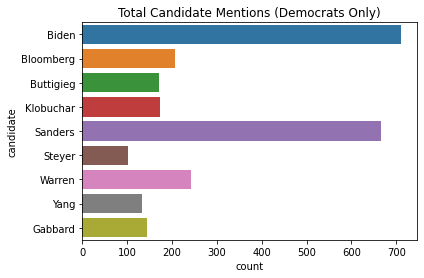

In [12]:
# without Trump
cand_total_no_trump = sum_cand_total[sum_cand_total['candidate'] != 'Trump']
sns.barplot(x = 'count', y = 'candidate', data = cand_total_no_trump)
plt.title('Total Candidate Mentions (Democrats Only)')

##### trends over time - only candidate

In [13]:
candidates.append('date')

In [14]:
one_cand_day = full_data.loc[full_data['candidates_mentioned'] == 1, candidates]

In [15]:
sum_one_cand_day = one_cand_day.groupby(['date']).sum()
sum_one_cand_day.reset_index(inplace = True)

In [16]:
sum_one_cand_day_long = pd.melt(sum_one_cand_day,
                                id_vars=['date'],
                                var_name='candidates', 
                                value_name='count')

Text(0.5, 1.0, 'Solo Candidate Mentions Over Time')

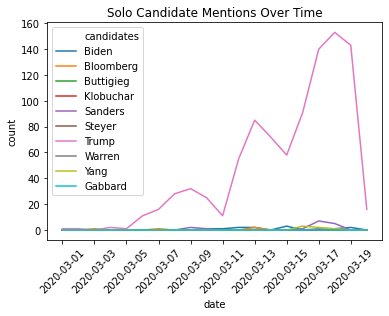

In [17]:
chart = sns.lineplot(x = 'date', y = 'count', hue = 'candidates', data = sum_one_cand_day_long)
plt.setp(chart.get_xticklabels(), rotation = 45)
plt.title('Solo Candidate Mentions Over Time')

In [18]:
# without Trump
one_cand_day_no_trump = sum_one_cand_day_long[sum_one_cand_day_long['candidates'] != 'Trump']

Text(0.5, 1.0, 'Solo Candidate Mentions Over Time (Democrats Only)')

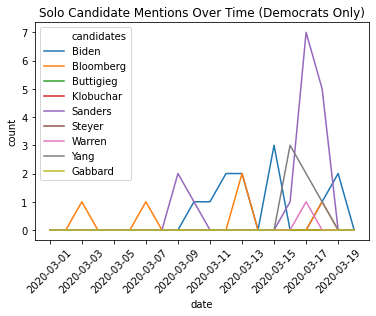

In [19]:
chart = sns.lineplot(x = 'date', y = 'count', hue = 'candidates', data = one_cand_day_no_trump)
plt.setp(chart.get_xticklabels(), rotation = 45)
plt.title('Solo Candidate Mentions Over Time (Democrats Only)')

##### trends over time - candidate mentioned at all

In [20]:
cand_day = full_data.loc[:, candidates]

In [21]:
sum_cand_total_day = cand_day.groupby(['date']).sum()
sum_cand_total_day.reset_index(inplace = True)

In [22]:
sum_cand_total_day_long = pd.melt(sum_cand_total_day,
                                  id_vars=['date'],
                                  var_name='candidates', 
                                  value_name='count')

Text(0.5, 1.0, 'Total Candidate Mentions Over Time')

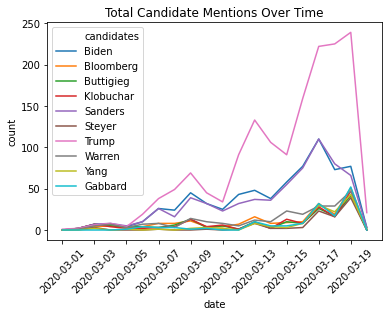

In [23]:
chart = sns.lineplot(x = 'date', y = 'count', hue = 'candidates', data = sum_cand_total_day_long)
plt.setp(chart.get_xticklabels(), rotation = 45)
plt.title('Total Candidate Mentions Over Time')

In [24]:
# without Trump
cand_total_day_no_trump = sum_cand_total_day_long[sum_cand_total_day_long['candidates'] != 'Trump']

Text(0.5, 1.0, 'Total Candidate Mentions Over Time (Democrats Only)')

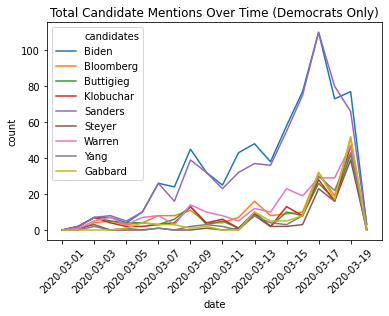

In [25]:
chart = sns.lineplot(x = 'date', y = 'count', hue = 'candidates', data = cand_total_day_no_trump)
plt.setp(chart.get_xticklabels(), rotation = 45)
plt.title('Total Candidate Mentions Over Time (Democrats Only)')

### Candidate Mentions - Sentence-Level

In [26]:
sentence_data = pd.read_csv('data/sentence_data.csv')
sentence_data['date'] = pd.to_datetime(sentence_data['date'], errors='coerce')
sentence_data['date'] = sentence_data['date'].dt.date

In [27]:
# filtering weird dates
mask = sentence_data['date'].astype('str') >= "2020-03-01"
sentence_data = sentence_data.loc[mask]

##### number of sentences where candidate is the only one mentioned

In [28]:
one_cand = sentence_data.loc[sentence_data['candidates_mentioned'] == 1, candidates]
sum_one_cand = one_cand.sum(axis = 0, skipna = True)
sum_one_cand = sum_one_cand.to_frame(name = 'count').rename_axis('candidate').reset_index()

In [30]:
sum_one_cand

,candidate,count
0,Biden,3655
1,Bloomberg,178
2,Buttigieg,70
3,Klobuchar,87
4,Sanders,3607
5,Steyer,4
6,Trump,7737
7,Warren,245
8,Yang,88
9,Gabbard,148


Text(0.5, 1.0, 'Solo Candidate Mentions')

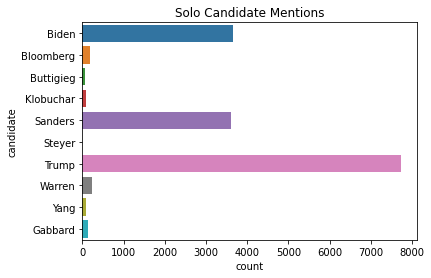

In [31]:
sns.barplot(x = 'count', y = 'candidate', data = sum_one_cand)
plt.title('Solo Candidate Mentions')

Text(0.5, 1.0, 'Solo Candidate Mentions (Democrats Only)')

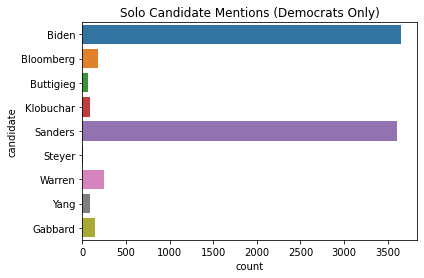

In [32]:
# without Trump
one_cand_no_trump = sum_one_cand[sum_one_cand['candidate'] != 'Trump']
sns.barplot(x = 'count', y = 'candidate', data = one_cand_no_trump)
plt.title('Solo Candidate Mentions (Democrats Only)')

##### number of sentences where candidate is mentioned (perhaps along with others)

In [33]:
sum_cand_total = sentence_data.loc[:, candidates].sum(axis = 0, skipna = True)
sum_cand_total = sum_cand_total.to_frame(name = 'count').rename_axis('candidate').reset_index()

In [34]:
sum_cand_total

,candidate,count
0,Biden,5808
1,Bloomberg,293
2,Buttigieg,175
3,Klobuchar,207
4,Sanders,5452
5,Steyer,13
6,Trump,8500
7,Warren,481
8,Yang,116
9,Gabbard,191


Text(0.5, 1.0, 'Total Candidate Mentions')

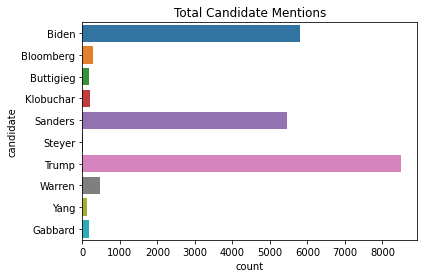

In [35]:
sns.barplot(x = 'count', y = 'candidate', data = sum_cand_total)
plt.title('Total Candidate Mentions')

Text(0.5, 1.0, 'Total Candidate Mentions (Democrats Only)')

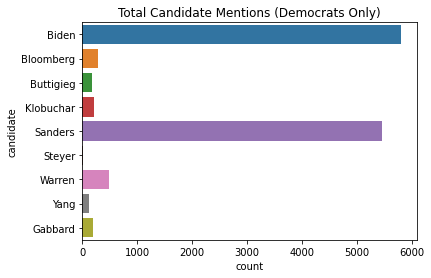

In [36]:
# without Trump
cand_total_no_trump = sum_cand_total[sum_cand_total['candidate'] != 'Trump']
sns.barplot(x = 'count', y = 'candidate', data = cand_total_no_trump)
plt.title('Total Candidate Mentions (Democrats Only)')

##### trends over time - only candidate

In [37]:
one_cand_day_sent = sentence_data.loc[sentence_data['candidates_mentioned'] == 1, candidates]

In [38]:
sum_one_cand_day = one_cand_day.groupby(['date']).sum()
sum_one_cand_day.reset_index(inplace = True)

In [39]:
sum_one_cand_day_long = pd.melt(sum_one_cand_day,
                                id_vars=['date'],
                                var_name='candidates', 
                                value_name='count')

Text(0.5, 1.0, 'Solo Candidate Mentions Over Time')

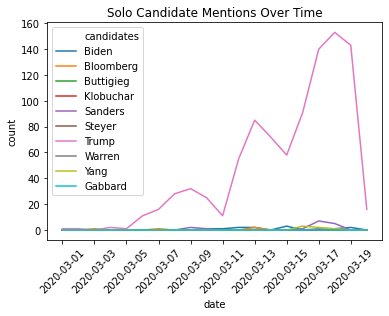

In [40]:
chart = sns.lineplot(x = 'date', y = 'count', hue = 'candidates', data = sum_one_cand_day_long)
plt.setp(chart.get_xticklabels(), rotation = 45)
plt.title('Solo Candidate Mentions Over Time')

In [41]:
# without Trump
one_cand_day_no_trump = sum_one_cand_day_long[sum_one_cand_day_long['candidates'] != 'Trump']

Text(0.5, 1.0, 'Solo Candidate Mentions Over Time (Democrats Only)')

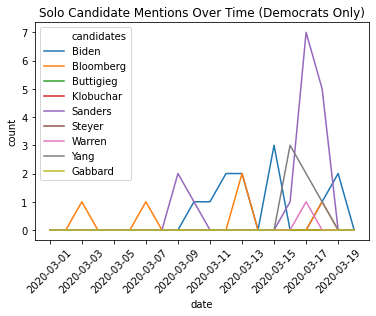

In [42]:
chart = sns.lineplot(x = 'date', y = 'count', hue = 'candidates', data = one_cand_day_no_trump)
plt.setp(chart.get_xticklabels(), rotation = 45)
plt.title('Solo Candidate Mentions Over Time (Democrats Only)')

##### trends over time - candidate mentioned at all

In [43]:
cand_day = sentence_data.loc[:, candidates]

In [44]:
sum_cand_total_day = cand_day.groupby(['date']).sum()
sum_cand_total_day.reset_index(inplace = True)

In [45]:
sum_cand_total_day_long = pd.melt(sum_cand_total_day,
                                  id_vars=['date'],
                                  var_name='candidates', 
                                  value_name='count')

Text(0.5, 1.0, 'Total Candidate Mentions Over Time')

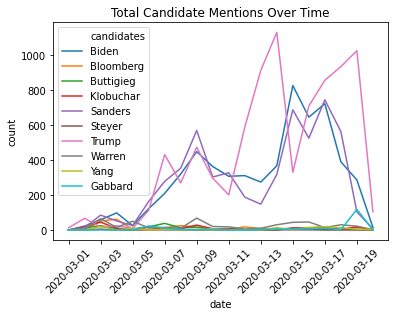

In [46]:
chart = sns.lineplot(x = 'date', y = 'count', hue = 'candidates', data = sum_cand_total_day_long)
plt.setp(chart.get_xticklabels(), rotation = 45)
plt.title('Total Candidate Mentions Over Time')

In [47]:
# without Trump
cand_total_day_no_trump = sum_cand_total_day_long[sum_cand_total_day_long['candidates'] != 'Trump']

Text(0.5, 1.0, 'Total Candidate Mentions Over Time (Democrats Only)')

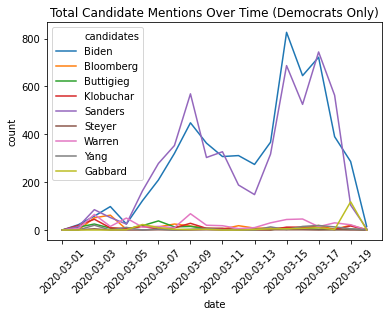

In [48]:
chart = sns.lineplot(x = 'date', y = 'count', hue = 'candidates', data = cand_total_day_no_trump)
plt.setp(chart.get_xticklabels(), rotation = 45)
plt.title('Total Candidate Mentions Over Time (Democrats Only)')